# Fraud detection in credit transactions

## 1. Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy as sc
import seaborn as sns
%matplotlib inline
from math import sqrt
matplotlib.style.use('ggplot')

## 2. Read data and preliminary analysis

In [2]:
data1 = pd.read_csv('bs140513_032310.csv')

In [19]:
print('Data shape: rows ={}, columns = {}'.format(data1.shape[0], data1.shape[1]))
data1.head()

Data shape: rows =594643, columns = 10


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [20]:
data1.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [21]:
data1.describe(include = 'object')

,customer,age,gender,zipcodeOri,merchant,zipMerchant,category
count,594643,594643,594643,594643,594643,594643,594643
unique,4112,8,4,1,50,1,15
top,'C1978250683','2','F','28007','M1823072687','28007','es_transportation'
freq,265,187310,324565,594643,299693,594643,505119


In [3]:
#zipcodeOri and zipMerchant doesn't have any predictive power, zero variance(unique value), so dropping them
df=data1.drop(columns=['zipcodeOri', 'zipMerchant'])

In [23]:
#Total length of time series.
len(df['step'].value_counts())

180

## 3. Performing Exploratory Data Analysis

### Analyzing distinct values of variables

In [24]:
#following functions analyzes the feature to the target variable and saves the csv file of the grouped datafram
def analyze(df,var, target_var, figsize = None):
    grp = df[[var, target_var]].groupby([var, target_var]).size().reset_index(name = 'count')
    val = "distribution of {} with fraud \n{}".format(var,grp)
    print(val)
    print('\t\tBar Chart')
    plt.figure()
    plt.figure(figsize = figsize)
    plt.title('Count of {} with {}'.format(target_var,var))
    ax = sns.barplot(x = var, y = 'count', hue = target_var,data = grp)
    plt.show()
    file_name = '{}_{}.csv'.format(var ,target_var)
    fig = ax.get_figure()
    fig.savefig(file_name +'.png')
    #print(file_name)
    grp.to_csv(file_name, index = False)

distribution of age with fraud 
    age  fraud   count
0   '0'      0    2404
1   '0'      1      48
2   '1'      0   57442
3   '1'      1     689
4   '2'      0  184966
5   '2'      1    2344
6   '3'      0  145376
7   '3'      1    1755
8   '4'      0  107615
9   '4'      1    1410
10  '5'      0   61956
11  '5'      1     686
12  '6'      0   26513
13  '6'      1     261
14  'U'      0    1171
15  'U'      1       7
		Bar Chart


<Figure size 432x288 with 0 Axes>

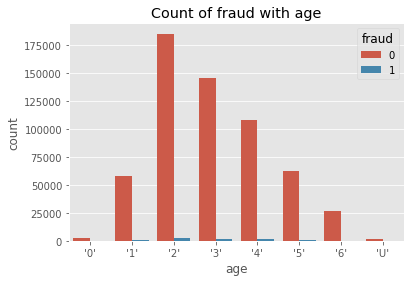

In [25]:
analyze(df, 'age', 'fraud')

distribution of gender with fraud 
  gender  fraud   count
0    'E'      0    1171
1    'E'      1       7
2    'F'      0  319807
3    'F'      1    4758
4    'M'      0  265950
5    'M'      1    2435
6    'U'      0     515
		Bar Chart


<Figure size 432x288 with 0 Axes>

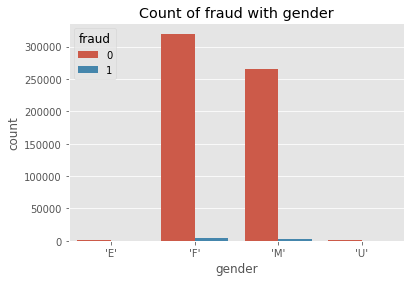

In [26]:
analyze(df, 'gender', 'fraud')

distribution of category with fraud 
                   category  fraud   count
0   'es_barsandrestaurants'      0    6253
1   'es_barsandrestaurants'      1     120
2             'es_contents'      0     885
3              'es_fashion'      0    6338
4              'es_fashion'      1     116
5                 'es_food'      0   26254
6               'es_health'      0   14437
7               'es_health'      1    1696
8                 'es_home'      0    1684
9                 'es_home'      1     302
10       'es_hotelservices'      0    1196
11       'es_hotelservices'      1     548
12               'es_hyper'      0    5818
13               'es_hyper'      1     280
14             'es_leisure'      0      25
15             'es_leisure'      1     474
16       'es_otherservices'      0     684
17       'es_otherservices'      1     228
18       'es_sportsandtoys'      0    2020
19       'es_sportsandtoys'      1    1982
20                'es_tech'      0    2212
21               

<Figure size 432x288 with 0 Axes>

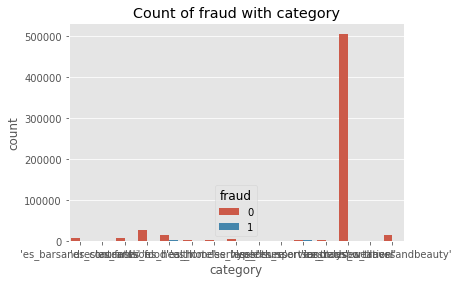

In [164]:
analyze(df, 'category', 'fraud')

In [27]:
#Number of transaction and Fraud by age
age2 = df.groupby('age').agg({'fraud':'sum','category':'count' }).reset_index().\
rename(columns = {'category':'num_transactions', 'fraud':'num_frauds'}).sort_values(by='num_transactions',ascending=False)
age2.to_csv('age2_fraud.csv', index = False)
age2

,age,num_frauds,num_transactions
2,'2',2344,187310
3,'3',1755,147131
4,'4',1410,109025
5,'5',686,62642
1,'1',689,58131
6,'6',261,26774
0,'0',48,2452
7,'U',7,1178


<Figure size 432x288 with 0 Axes>

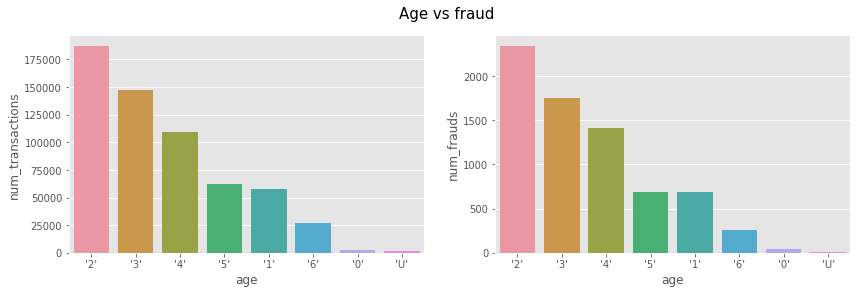

In [78]:
fig = plt.figure()
fig, axes = plt.subplots(1,2, figsize = (14,4))
plt.suptitle('Age vs fraud', fontsize = 15)

fig1 = sns.barplot(data = age2, x = 'age', y = 'num_transactions', ax = axes[0])
fig2 = sns.barplot(data = age2, x = 'age', y = 'num_frauds', ax = axes[1])
fig.savefig('age2_fraud.csv.png')                 

In [58]:
#Number of transaction and Fraud by gender
gender2 = df.groupby('gender').agg({'category':'count','fraud':'sum'}).reset_index().\
rename(columns = {'category':'num_transactions', 'fraud':'num_frauds'}).sort_values(by='num_transactions',ascending=False)
gender2.to_csv('gender2_fraud.csv', index = False)
gender2

,gender,num_transactions,num_frauds
1,'F',324565,4758
2,'M',268385,2435
0,'E',1178,7
3,'U',515,0


<Figure size 432x288 with 0 Axes>

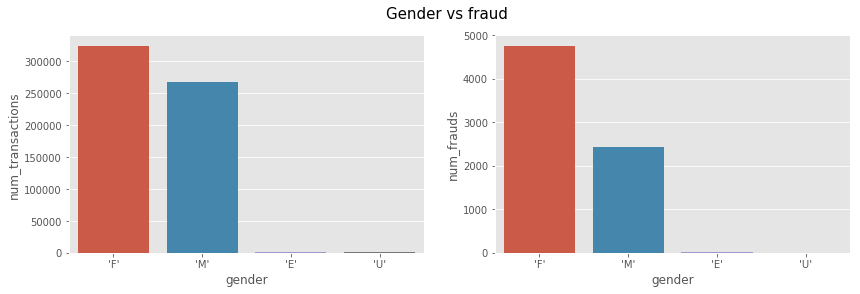

In [101]:
fig = plt.figure()
fig, axes = plt.subplots(1,2, figsize = (14,4))

plt.suptitle('Gender vs fraud', fontsize = 15)

fig1 = sns.barplot(data = gender2, x = 'gender', y = 'num_transactions', ax = axes[0])
fig2 = sns.barplot(data = gender2, x = 'gender', y = 'num_frauds', ax = axes[1])

fig.savefig('gender2_fraud.csv.png')                 

In [69]:
#Top 10 Customers based on number of transaction along with number of fraud
cust = df.groupby('customer').agg({'fraud':'sum','category':'count' }).reset_index().\
rename(columns = {'category':'num_transactions', 'fraud':'num_frauds'}).sort_values(by='num_transactions',ascending=False).head(10)
cust.to_csv('cust_fraud.csv', index = False)
cust.head(2)

,customer,num_frauds,num_transactions
2132,'C1978250683',110,265
615,'C1275518867',114,252


<Figure size 432x288 with 0 Axes>

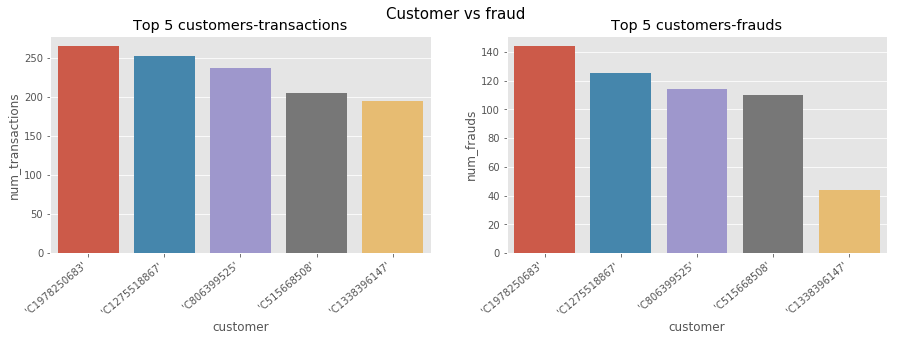

In [144]:
fig = plt.figure()
fig, axes = plt.subplots(1,2, figsize = (15,4))
plt.suptitle('Customer vs fraud', fontsize = 15)

fig1 = sns.barplot(data = cust.head(), x = 'customer', y = 'num_transactions', ax = axes[0], label = 'abc')
fig2 = sns.barplot(data = cust.sort_values(by = 'num_frauds', ascending = False).head(), x = 'customer', y = 'num_frauds', ax = axes[1])
axes[0].set_title('Top 5 customers-transactions')
#axes[0].xaxis.set_tick_params()
axes[1].set_title('Top 5 customers-frauds')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha='right')
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha='right')
fig.savefig('cust_fraud.csv.png')  

In [125]:
#Top 10 Merchant based on number of transaction along with number of fraud
mer = df.groupby('merchant').agg({'fraud':'sum','category':'count' }).reset_index().\
rename(columns = {'category':'num_transactions', 'fraud':'num_frauds'}).sort_values(by='num_transactions',ascending=False).head(10)
mer.to_csv('merchant_fraud.csv', index = False)
mer.head(2)

,merchant,num_frauds,num_transactions
18,'M1823072687',0,299693
30,'M348934600',0,205426


<Figure size 432x288 with 0 Axes>

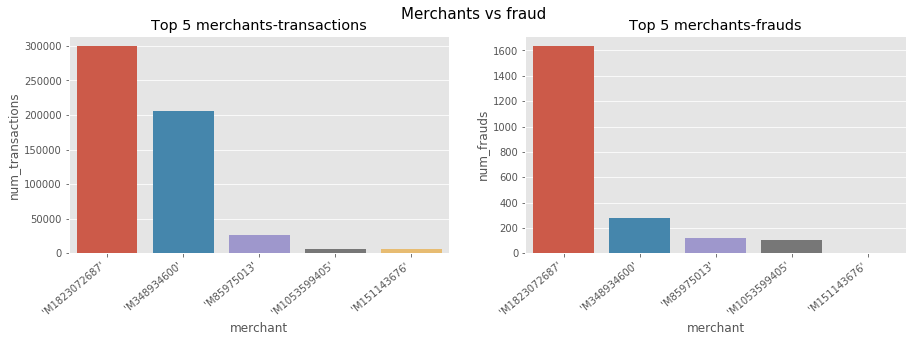

In [143]:
fig = plt.figure()
fig, axes = plt.subplots(1,2, figsize = (15,4))
plt.suptitle('Merchants vs fraud', fontsize = 15)

fig1 = sns.barplot(data = mer.head(), x = 'merchant', y = 'num_transactions', ax = axes[0], label = 'abc')
fig2 = sns.barplot(data = mer.sort_values(by = 'num_frauds', ascending = False).head(), x = 'merchant', y = 'num_frauds', ax = axes[1])
axes[0].set_title('Top 5 merchants-transactions')
axes[1].set_title('Top 5 merchants-frauds')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha='right')
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha='right')
fig.savefig('merchant_fraud.csv.png')  

In [4]:
#Top 10 category based on number of transaction along with number of fraud
cat = df.groupby('category').agg({'fraud':'sum','customer':'count' }).reset_index().\
rename(columns = {'customer':'num_transactions', 'fraud':'num_frauds'}).sort_values(by='num_transactions',ascending=False).head(10)
cat.to_csv('cat_fraud.csv', index = False)
cat.head(2)

,category,num_frauds,num_transactions
12,'es_transportation',0,505119
3,'es_food',0,26254


<Figure size 432x288 with 0 Axes>

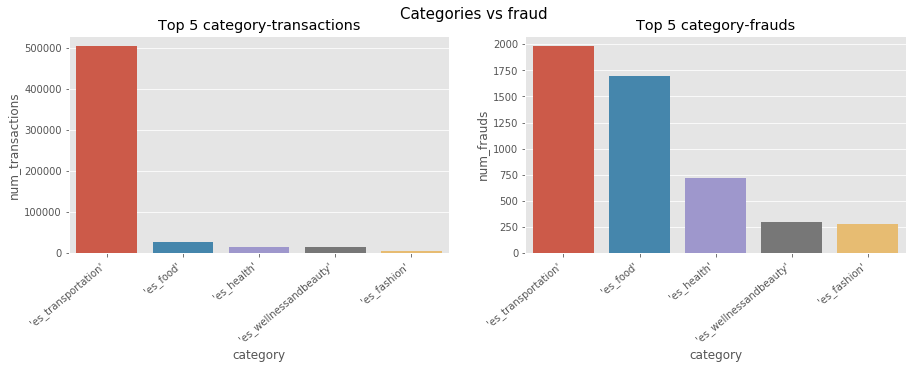

In [147]:
fig = plt.figure()
fig, axes = plt.subplots(1,2, figsize = (15,4))
plt.suptitle('Categories vs fraud', fontsize = 15)

fig1 = sns.barplot(data = cat.head(), x = 'category', y = 'num_transactions', ax = axes[0], label = 'abc')
fig2 = sns.barplot(data = cat.sort_values(by = 'num_frauds', ascending = False).head(), x = 'category', y = 'num_frauds', ax = axes[1])
axes[0].set_title('Top 5 category-transactions')
axes[1].set_title('Top 5 category-frauds')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha='right')
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha='right')
fig.savefig('cat_fraud.csv.png')

## Analyzing the target variable - fraud

In [34]:
#checking for number and percentage of frauds
print(df[['amount', 'fraud']].groupby('fraud',as_index = False).count())

   fraud  amount
0      0  587443
1      1    7200


In [106]:
print('Overall percentage of fraud\n',df[['amount', 'fraud']].groupby('fraud').count()*100/len(df))

Overall percentage of fraud
           amount
fraud           
0      98.789189
1       1.210811


In [105]:
print('Mean and median amount of transactions wrt frauds')
df.groupby('fraud', as_index = False).agg({'amount':['mean', 'median']})

Mean and median amount of transactions wrt frauds


fraud      amount         
               mean   median
0     0   31.847230   26.610
1     1  530.926551  319.175

#### We can clearly see in case of fraud transactions the mean and median amount is quite high comparatively

<Figure size 432x288 with 0 Axes>

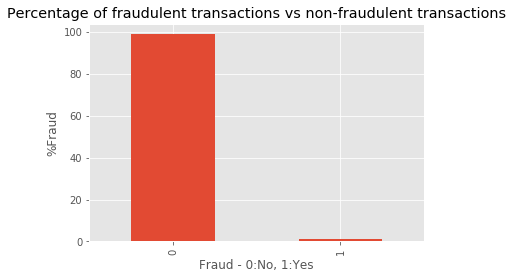

In [146]:
plt.figure()
#figure.figsize()
pd.DataFrame(df[['amount', 'fraud']].groupby('fraud').count()*100/len(df)).plot(kind = 'bar', legend = False)
plt.title('Percentage of fraudulent transactions vs non-fraudulent transactions')
plt.xlabel('Fraud - 0:No, 1:Yes')
plt.ylabel('%Fraud')
plt.savefig('percent of fraud transactions.png')

#### Above analysis shows number of frauds are very less among all transactions
#### Also the mean and median amount is high for fradulent transactions
### Also checking the values for amount above 99 percentile

In [162]:
amount_99percentile = df['amount'].quantile(q=0.99)
print('99th percentile value: ',amount_99percentile)
print('No. of rows above 0.99 percentile: ',df[df['amount'] > amount_99percentile].shape[0])
print('',df[df['amount'] > amount_99percentile]['fraud'].value_counts())
df[df['amount'] > amount_99percentile]['fraud'].value_counts()/len(df[df['amount'] > amount_99percentile]['fraud'])

99th percentile value:  236.75579999999957
No. of rows above 0.99 percentile:  5947
 1    4567
0    1380
Name: fraud, dtype: int64


1    0.76795
0    0.23205
Name: fraud, dtype: float64

The percentage of fraud goes higher as the amount of transaction goes up.

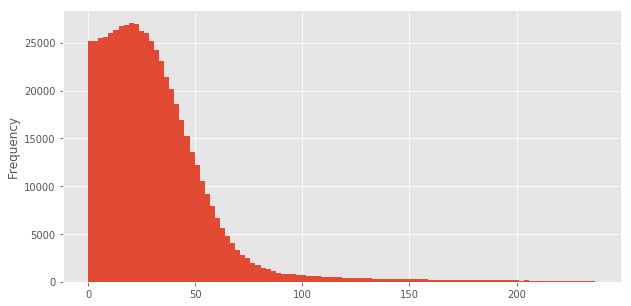

In [163]:
fig = df[df['amount'] < amount_99percentile].amount.plot(kind = 'hist', bins = 100, figsize = (10,5))
fig = fig.get_figure()
fig.savefig('amount99percentile.png')

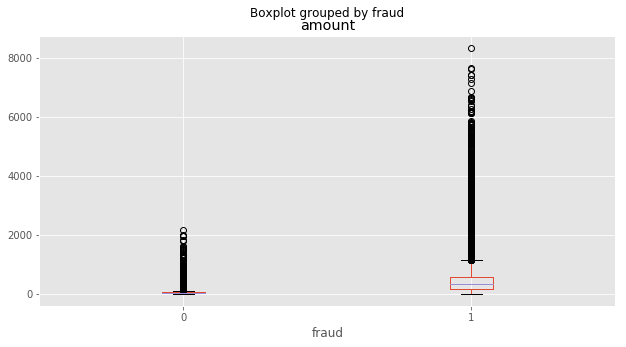

In [15]:
df[['amount', 'fraud']].boxplot(column = 'amount', by = 'fraud', figsize = (10,5))

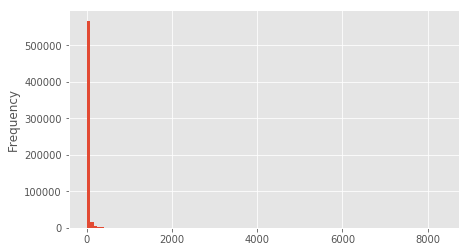

In [5]:
df.amount.plot(kind = 'hist', bins = 100, figsize = (7,4))

In [12]:
#Creating log amount +1 and plotting histogram
df['log_amount'] = np.log(df['amount']+1)

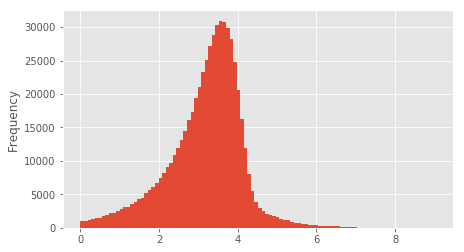

In [67]:
fig = df.log_amount.plot(kind = 'hist', bins = 100, figsize = (7,4))
#df.log_amount.plot(kind = 'kde',figsize = (7,4))
df[['log_amount']].to_csv('amount_log_histogram.csv',index = False )
fig = fig.get_figure()
fig.savefig('amount_log_histogram.csv.png')

In [25]:
df.query('amount == 0').query('fraud == 1').count()

step          0
customer      0
age           0
gender        0
merchant      0
category      0
amount        0
fraud         0
log_amount    0
dtype: int64

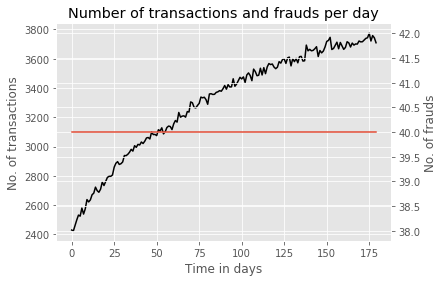

In [6]:
#Checking for number of transactions vs. number of frauds per day
X1 = df[['step']].groupby('step').size().values
X2 = df[['step','fraud']].groupby('step').sum().values
figure = plt.figure()
ax = plt.gca()

plt.title('Number of transactions and frauds per day')
plt.xlabel('Time in days')
plt.ylabel('No. of transactions')
#fig = plt.figure()
ax.plot(X1, color = 'black')
ax2 = plt.twinx()
ax2.plot(X2)
plt.ylabel('No. of frauds')
#plt.legend()
plt.show()
#figure = figure.get_figure()
#figure.savefig('Transactions vs frauds.png')
## save as dataframe..3 columns step, trans, frauds.................

In [19]:
transactionVsFraud = pd.DataFrame(data = {'Transactions': X1, 'Frauds': X2.ravel()})
transactionVsFraud.to_csv('transactionVsFraud.csv')

### Deeper analysis on effect of merchant on frauds

In [44]:
#Checking for merchants with the highest number of frauds per number of transactions at them \
# Also checking the median amount of fraud amount at these merchants
df2 = df.groupby('merchant', as_index = False).agg({'customer':'count','fraud': 'sum', 'amount':'median','category': 'unique'})\
.rename(columns = {'customer': 'Count_transactions', 'fraud': 'Num_frauds', 'amount': 'Median_amount'})
df2['ratio_fraud_transactions']=np.where(df2.Num_frauds ==0,0, df2.Num_frauds/df2.Count_transactions * 100)
df2.sort_values(by ='ratio_fraud_transactions', ascending = False, inplace = True )
#df2 = df2[df2['Num_frauds'] != 0].reset_index(drop = True)
df2.head(20)

,merchant,Count_transactions,Num_frauds,Median_amount,category,ratio_fraud_transactions
3,'M1294758098',191,184,289.440,['es_leisure'],96.335079
32,'M3697346',308,290,300.355,['es_leisure'],94.155844
21,'M1873032707',250,216,291.740,['es_hotelservices'],86.400000
40,'M732195782',608,518,1964.460,['es_travel'],85.197368
49,'M980657600',1769,1472,249.050,['es_sportsandtoys'],83.210854
6,'M1353266412',78,64,308.425,['es_hotelservices'],82.051282
44,'M857378720',122,92,301.455,['es_hotelservices'],75.409836
26,'M2080407379',48,36,2074.950,['es_travel'],75.000000
25,'M2011752106',244,166,222.255,['es_hotelservices'],68.032787
14,'M17379832',282,178,173.300,['es_sportsandtoys'],63.120567


In [157]:
df2.to_csv('merchant2.csv', index = False)

Text(0.5,0,'Merchants with frauds')

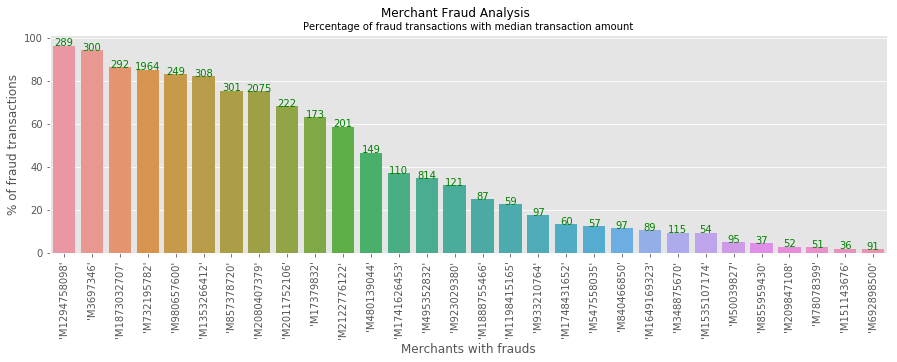

In [45]:
df2_plot = df2[df2['Num_frauds'] != 0].reset_index(drop = True)
plt.figure(figsize = (15,4))
g =sns.barplot(data = df2_plot, x = 'merchant', y = 'ratio_fraud_transactions')
for index, row in df2_plot.iterrows():
    g.text(row.name,row.ratio_fraud_transactions,round(row.Median_amount), color='g', ha="center")
plt.xticks(rotation = 90)
plt.ylabel('% of fraud transactions')
plt.suptitle('Merchant Fraud Analysis')
plt.title('Percentage of fraud transactions with median transaction amount', fontsize = 10)
plt.xlabel('Merchants with frauds')
# plt.savefig('merchant2.csv.png')

### Deepar analysis for effect of category on frauds

In [46]:
#Checking for category with the highest number of frauds per number of transactions at them \
# Also checking the median amount of fraud amount at these category
df_category = df.groupby('category', as_index = False).agg({'customer':'count','fraud': 'sum', 'amount':'median', 'merchant': 'unique'})\
.rename(columns = {'customer': 'Count_transactions', 'fraud': 'Num_frauds', 'amount': 'Median_amount', 'merchant': 'total_merchants'})
df_category['ratio_fraud_transactions']=np.where(df_category.Num_frauds ==0,0, df_category.Num_frauds/df_category.Count_transactions * 100)
df_category.sort_values(by ='ratio_fraud_transactions', ascending = False, inplace = True )
#df_category = df_category[df_category['Num_frauds'] != 0].reset_index(drop = True)
df_category.head(10)

,category,Count_transactions,Num_frauds,Median_amount,total_merchants,ratio_fraud_transactions
8,'es_leisure',499,474,296.660,"['M3697346', 'M1294758098']",94.989980
13,'es_travel',728,578,1888.460,"['M732195782', 'M495352832', 'M2080407379', 'M...",79.395604
10,'es_sportsandtoys',4002,1982,134.175,"['M1741626453', 'M980657600', 'M17379832', 'M1...",49.525237
6,'es_hotelservices',1744,548,131.940,"['M348875670', 'M1873032707', 'M2011752106', '...",31.422018
9,'es_otherservices',912,228,87.280,['M1888755466'],25.000000
5,'es_home',1986,302,111.310,"['M2122776122', 'M117188757', 'M923029380', 'M...",15.206445
4,'es_health',16133,1696,97.890,"['M50039827', 'M1053599405', 'M480139044', 'M6...",10.512614
11,'es_tech',2370,158,90.390,"['M840466850', 'M1842530320', 'M1416436880']",6.666667
14,'es_wellnessandbeauty',15086,718,51.895,"['M1535107174', 'M209847108', 'M1198415165', '...",4.759380
7,'es_hyper',6098,280,36.750,['M855959430'],4.591669


Text(0.5,0,'Categories')

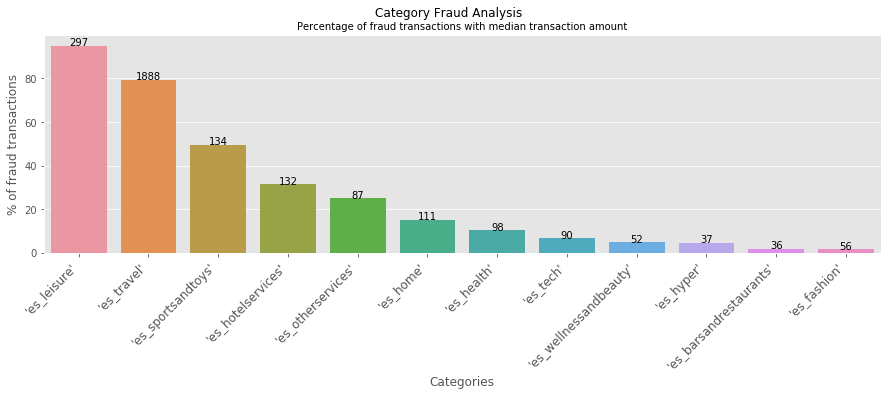

In [43]:
df_category_plot = df_category[df_category['Num_frauds'] != 0].reset_index(drop = True)
plt.figure(figsize = (15,4))
g =sns.barplot(data = df_category_plot, x = 'category', y = 'ratio_fraud_transactions')
plt.xticks(rotation = 45, fontsize = 12, ha = 'right')
for index, row in df_category_plot.iterrows():
    g.text(row.name,row.ratio_fraud_transactions,round(row.Median_amount), color='black', ha="center")
plt.ylabel('% of fraud transactions')
plt.suptitle('Category Fraud Analysis')
plt.title('Percentage of fraud transactions with median transaction amount', fontsize = 10)
plt.xlabel('Categories', fontsize = 12)

# df_category.to_csv('category2.csv', index = False)
# plt.savefig('category2.csv.png')

## Analysis by customer

In [6]:
df_customer = df.groupby('customer', as_index = False).agg({'fraud': ['count','sum'],\
                                                            'amount':['mean','median','min','max'],
                                                            'category': ['nunique','count','unique'],
                                                            'merchant': ['nunique','count','unique']})\
#.rename(columns = {'customer': 'Count_transactions', 'fraud': 'Num_frauds', 'amount': 'Median_amount', 'merchant': 'total_merchants'})
df_customer.columns = ['_'.join(col) for col in df_customer.columns]
df_customer.rename(columns = {'customer_':'customer','fraud_count': 'cust_num_transactions', 'fraud_sum': 'cust_num_frauds'}, inplace = True)
df_customer['cust_ratio_fraud_transactions']=np.where(df_customer.cust_num_frauds ==0,0, df_customer.cust_num_frauds/df_customer.cust_num_transactions * 100)
df_customer.sort_values(by ='cust_ratio_fraud_transactions', ascending = False, inplace = True)
#df_customer = df_customer[df_customer['num_frauds'] != 0].reset_index(drop = True)
df_customer = df_customer.reset_index(drop = True)
df_customer.head(4)
#df_customer.shape
#add age -

,customer,cust_num_transactions,cust_num_frauds,amount_mean,amount_median,amount_min,amount_max,category_nunique,category_count,category_unique,merchant_nunique,merchant_count,merchant_unique,cust_ratio_fraud_transactions
0,'C910454738',92,87,410.820761,335.995,5.45,4187.09,12,92,"['es_travel', 'es_sportsandtoys', 'es_fashion'...",22,92,"['M732195782', 'M980657600', 'M547558035', 'M8...",94.565217
1,'C2004941826',126,119,513.897460,296.030,4.71,4091.43,12,126,"['es_sportsandtoys', 'es_barsandrestaurants', ...",24,126,"['M980657600', 'M151143676', 'M480139044', 'M8...",94.444444
2,'C381007057',100,89,513.888700,254.180,18.05,6129.63,10,100,"['es_sportsandtoys', 'es_health', 'es_leisure'...",22,100,"['M980657600', 'M692898500', 'M50039827', 'M93...",89.000000
3,'C1572610482',101,89,581.060693,311.040,6.19,4953.41,11,101,"['es_health', 'es_wellnessandbeauty', 'es_spor...",23,101,"['M480139044', 'M209847108', 'M980657600', 'M8...",88.118812


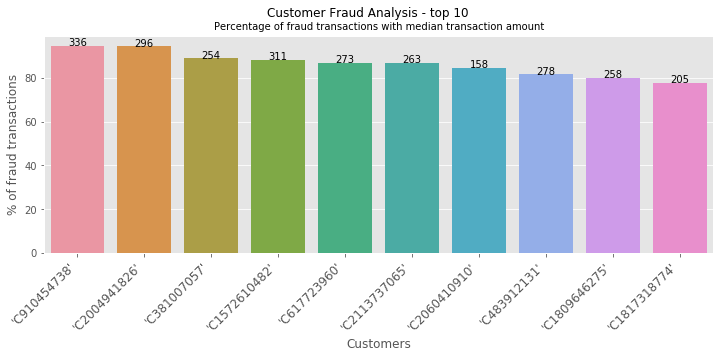

In [182]:
plt.figure(figsize = (12,4))
g =sns.barplot(data = df_customer.head(10), x = 'customer', y = 'cust_ratio_fraud_transactions')
plt.xticks(rotation = 45, fontsize = 12, ha = 'right')
for index, row in df_customer.head(10).iterrows():
    g.text(row.name,row.cust_ratio_fraud_transactions,round(row.amount_median), color='black', ha="center")
plt.ylabel('% of fraud transactions')
plt.suptitle('Customer Fraud Analysis - top 10')
plt.title('Percentage of fraud transactions with median transaction amount', fontsize = 10)
plt.xlabel('Customers', fontsize = 12)

df_customer.head(10).to_csv('customer2.csv', index = False)
plt.savefig('customer2.csv.png')

In [13]:
columnstokeep = ['customer','cust_num_transactions','cust_num_frauds','cust_ratio_fraud_transactions','amount_mean','amount_median','step','merchant','category','log_amount','amount', 'fraud']
df_cust2 = pd.merge(df, df_customer, on = 'customer')[columnstokeep]\
    .sort_values(by = 'cust_num_frauds', ascending = False).reset_index(drop = True)\
    .rename(columns = {'amount_mean':'cust_amount_mean', 'amount_median':'cust_amount_median'})
df_cust2.head()

,customer,cust_num_transactions,cust_num_frauds,cust_ratio_fraud_transactions,cust_amount_mean,cust_amount_median,step,merchant,category,log_amount,amount,fraud
0,'C1350963410',191,144,75.39267,294.331728,179.99,134,'M1294758098','es_leisure',5.861754,350.34,1
1,'C1350963410',191,144,75.39267,294.331728,179.99,73,'M732195782','es_travel',7.719263,2250.30,1
2,'C1350963410',191,144,75.39267,294.331728,179.99,80,'M1294758098','es_leisure',5.069344,158.07,1
3,'C1350963410',191,144,75.39267,294.331728,179.99,80,'M1741626453','es_sportsandtoys',2.891482,17.02,1
4,'C1350963410',191,144,75.39267,294.331728,179.99,79,'M857378720','es_hotelservices',5.947669,381.86,1


In [48]:
df_final = pd.merge(df_cust2, df_category[['category', 'ratio_fraud_transactions']], on = 'category').\
    rename(columns = {'ratio_fraud_transactions':'category_ratio_fraud_transactions'})

In [51]:
df_final = pd.merge(df_final, df2[['merchant', 'ratio_fraud_transactions']], on = 'merchant')\
    .rename(columns = {'ratio_fraud_transactions':'merchant_ratio_fraud_transactions'})

In [54]:
df_final.to_csv('df_final.csv', index = False)